# Bloom ii

I really liked the simple gradient of the last one, but I'd like to try adding in a grainy effect to it

In [1]:
from typing import List, Tuple
import random

import shades
import numpy as np

Initial "Cloud" class which is going to do all the work for us

In [2]:
class Cloud(shades.Shade):

    def __init__(self, color, canvas: shades.Canvas, noise=shades.NoiseField(), air=0.3, fuzz=30):
        super().__init__(color)
        self.cloud_noise = noise
        self.air = air
        self.canvas = canvas
        self.fuzz=30  # <- this is the new bit I'm adding in

    def determine_shade(self, xy_coords):
        color = self.canvas.getpixel(xy_coords)
        noise = self.cloud_noise.noise(xy_coords) - 0.5
        noise = max(noise, 0)
        return shades.color_clamp([
            np.average(
                [color[i], self.color[i]],
                weights=[0.5, noise*self.air],
            ) + random.uniform(-self.fuzz, self.fuzz)  # <- whenever a color is placed, vary it randomly
            for i in range(3)
        ])

In [3]:
def bloom(
        palette: List[Tuple[int]] = [(250, 250, 0), (250, 0, 250), (0, 250, 250)]
    ) -> shades.Canvas:
    canvas = shades.Canvas(400, 800)
    random.shuffle(palette)
    for color in palette:
        tone = Cloud(
            color,
            noise=shades.NoiseField(scale=0.003),
            canvas=canvas,
            air=random.uniform(0.2, 0.9),
            fuzz=random.randint(20, 60),
        )
        tone.fill(canvas)
    return canvas

In [4]:
def random_palette():
    palettes = [
        [(27, 26, 23), (240, 165, 0), (228, 88, 38), (230, 213, 183)],
        [(84, 99, 255), (236, 236, 236), (255, 195, 0), (255, 24, 24)],
        [(255, 211, 45), (0, 142, 137), (8, 94, 125), (8, 69, 148)],
        [(21, 114, 161), (154, 208, 236), (239, 218, 215), (227, 190, 198)],
        [(150, 206, 180), (255, 238, 173), (217, 83, 79), (255, 173, 96)],
        [(0, 255, 255), (255, 0, 255), (255, 255, 0)],
        [(250, 0, 0), (0, 255, 0), (0, 0, 255)],
    ]
    return random.choice(palettes)

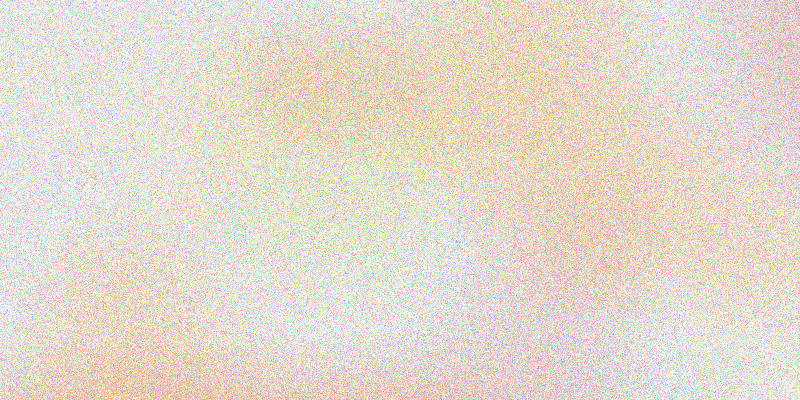

In [5]:
bloom(random_palette())

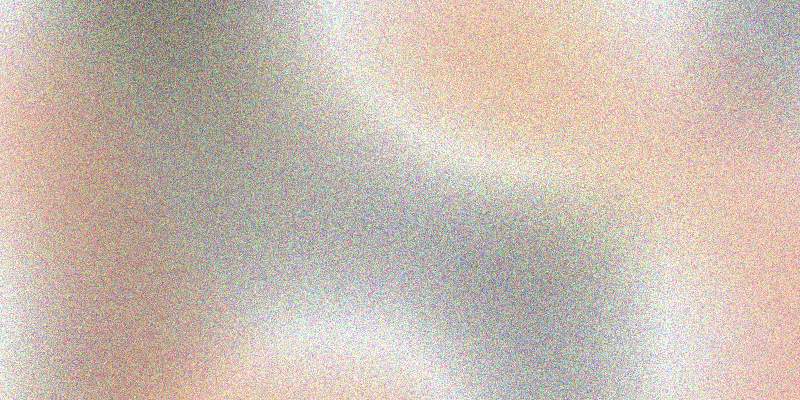

In [6]:
bloom(random_palette())

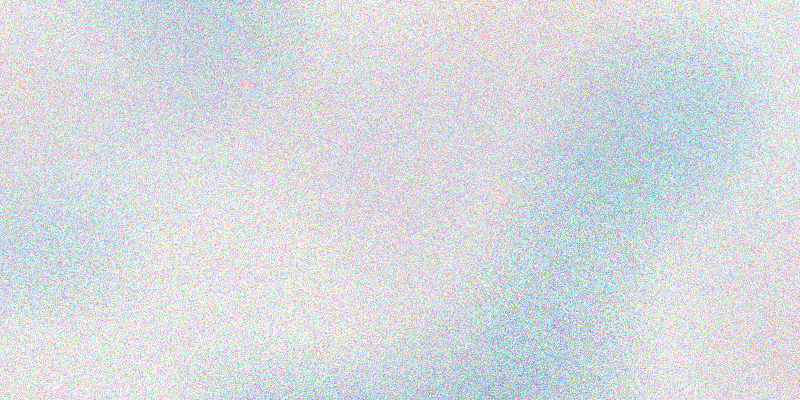

In [7]:
bloom(random_palette())